##  Implement Ridge & Lasso in Polynomial Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml

# Load the Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

# Select multiple features
X = df[["RM", "LSTAT", "CRIM"]]
y = df["MEDV"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial degree
degree = 2

# Ridge Regression (L2)
ridge_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression (L1)
lasso_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(alpha=0.1, max_iter=10000))
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Linear Regression (No Regularization)
linear_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Compute Errors
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
linear_mse = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression MSE: {linear_mse:.2f}")
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

Linear Regression MSE: 16.95
Ridge Regression MSE: 17.71
Lasso Regression MSE: 20.01


## Tune the Regularization Strength (α)

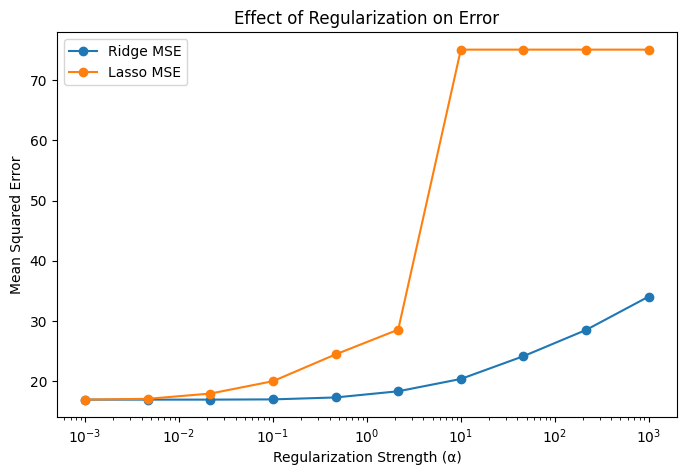

In [5]:
alphas = np.logspace(-3, 3, 10)  # α values from 0.001 to 1000
ridge_errors = []
lasso_errors = []

for alpha in alphas:
    ridge_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=alpha))
    lasso_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(alpha=alpha, max_iter=10000))

    ridge_model.fit(X_train, y_train)
    lasso_model.fit(X_train, y_train)

    y_pred_ridge = ridge_model.predict(X_test)
    y_pred_lasso = lasso_model.predict(X_test)

    ridge_errors.append(mean_squared_error(y_test, y_pred_ridge))
    lasso_errors.append(mean_squared_error(y_test, y_pred_lasso))

# Plot errors vs. α
plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_errors, label="Ridge MSE", marker="o")
plt.plot(alphas, lasso_errors, label="Lasso MSE", marker="o")
plt.xscale("log")
plt.xlabel("Regularization Strength (α)")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Regularization on Error")
plt.legend()
plt.show()